Import first dataset "NY citywide payroll".

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

sns.set()

payroll = pd.read_csv('ny-citywide-payroll-data-fiscal-year/citywide-payroll-data-fiscal-year.csv');

In [2]:
#list(payroll)

In [22]:
#clean up column names
payroll.columns = payroll.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '');

In [4]:
list(payroll)

['fiscal_year',
 'payroll_number',
 'agency_name',
 'last_name',
 'first_name',
 'mid_init',
 'agency_start_date',
 'work_location_borough',
 'title_description',
 'leave_status_as_of_june_30',
 'base_salary',
 'pay_basis',
 'regular_hours',
 'regular_gross_paid',
 'ot_hours',
 'total_ot_paid',
 'total_other_pay']

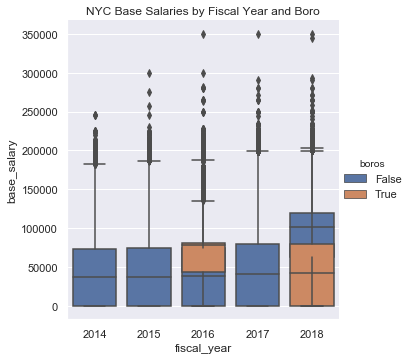

In [5]:
payroll["boros"] = payroll["work_location_borough"].isin(["MANHATTAN", "BROOKLYN", "BRONX", "QUEENS"])
sns.catplot(x="fiscal_year", y="base_salary", hue="boros",
            kind="box", dodge=False, data=payroll)
plt.title('NYC Base Salaries by Fiscal Year and Boro');

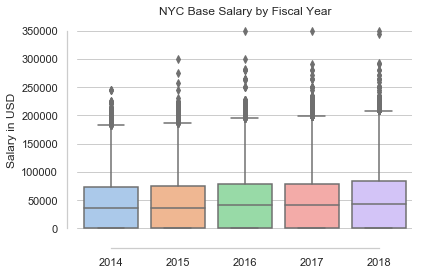

In [6]:
sns.set(style="whitegrid")

pybx = sns.boxplot(x='fiscal_year',y='base_salary',data= payroll ,palette='pastel')  

plt.title('NYC Base Salary by Fiscal Year')

sns.despine(offset=10, trim=True)
pybx.set(xlabel='', ylabel='Salary in USD')

plt.show();

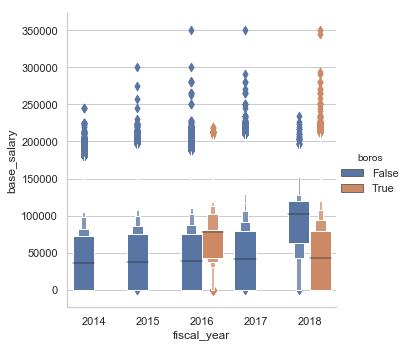

In [7]:
sns.catplot(x="fiscal_year", y="base_salary", hue='boros', kind="boxen",
            data=payroll);

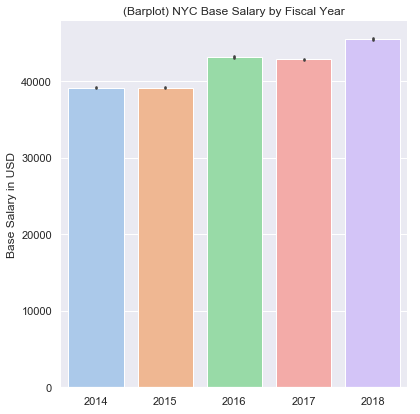

In [8]:
sns.set(style="darkgrid")

pybr = sns.catplot(x="fiscal_year", y="base_salary", data=payroll,height=6, kind="bar", palette="pastel", ci=95)
pybr.despine(left=True)
pybr.set_ylabels("Base Salary in USD")
pybr.set_xlabels("")
plt.title('(Barplot) NYC Base Salary by Fiscal Year')
plt.show();

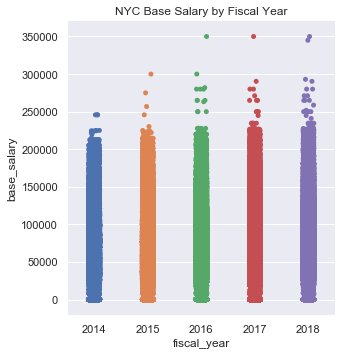

In [9]:
sns.catplot(x="fiscal_year", y="base_salary", data=payroll)
plt.title('NYC Base Salary by Fiscal Year');

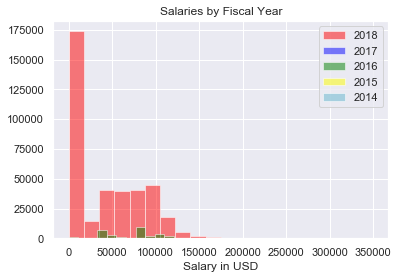

In [10]:
base2018 = payroll.loc[(payroll['fiscal_year']== 2018)&(payroll['work_location_borough']=='MANHATTAN'),'base_salary']
base2017 = payroll.loc[(payroll['fiscal_year'] == 2017)&(payroll['work_location_borough']=='MANHATTAN'),'base_salary']
base2016 = payroll.loc[(payroll['fiscal_year'] == 2016)&(payroll['work_location_borough']=='MANHATTAN'),'base_salary']
base2015 = payroll.loc[(payroll['fiscal_year'] == 2015)&(payroll['work_location_borough']=='MANHATTAN'),'base_salary']
base2014 = payroll.loc[(payroll['fiscal_year'] == 2014)&(payroll['work_location_borough']=='MANHATTAN'),'base_salary']

plt.hist(base2018, color='red', bins=20, alpha=.5,label='2018')
plt.hist(base2017, color='blue', bins=20, alpha=.5,label='2017')
plt.hist(base2016, color='green', bins=20, alpha=.5,label='2016')  
plt.hist(base2015, color='yellow',bins=20, alpha=.5,label='2015')
plt.hist(base2014, color='c', bins=20, alpha=.5, label='2014')
plt.xlabel('Salary in USD')
plt.legend(loc='upper right')
plt.title('Salaries by Fiscal Year')
plt.show()

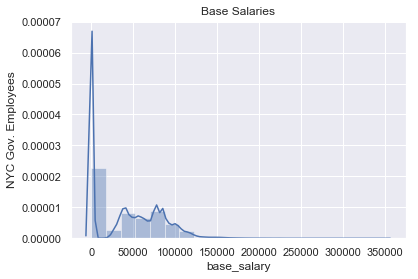

In [11]:
sns.set_context('notebook')
sns.distplot(payroll.base_salary, bins=20)
plt.title('Base Salaries')
plt.ylabel('NYC Gov. Employees');

Exploring a new dataset with "Countries of the World".

In [12]:
countries =pd.read_csv('countries of the world.csv')
list(countries)

['Country',
 'Region',
 'Population',
 'Area (sq. mi.)',
 'Pop. Density (per sq. mi.)',
 'Coastline (coast/area ratio)',
 'Net migration',
 'Infant mortality (per 1000 births)',
 'GDP ($ per capita)',
 'Literacy (%)',
 'Phones (per 1000)',
 'Arable (%)',
 'Crops (%)',
 'Other (%)',
 'Climate',
 'Birthrate',
 'Deathrate',
 'Agriculture',
 'Industry',
 'Service']

In [13]:
#clean up column names
countries.columns =countries.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%','').str.replace('.', '_').str.replace('$','')

In [14]:
#list(countries)

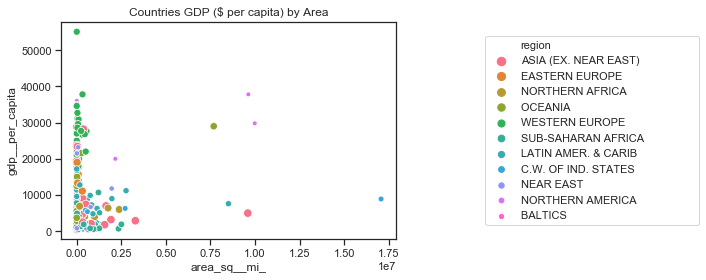

In [15]:
sns.set_style('ticks')
sns.set_context('notebook')
pysct = sns.scatterplot(x="area_sq__mi_",y="gdp__per_capita", hue="region", size="region", data=countries)
pysct.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('Countries GDP ($ per capita) by Area');


''

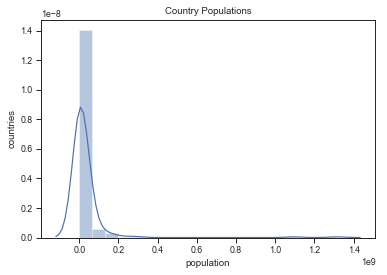

In [16]:
sns.set_context('paper')
sns.distplot(countries.population, bins=20)
plt.title('Country Populations')
plt.ylabel('countries')
;

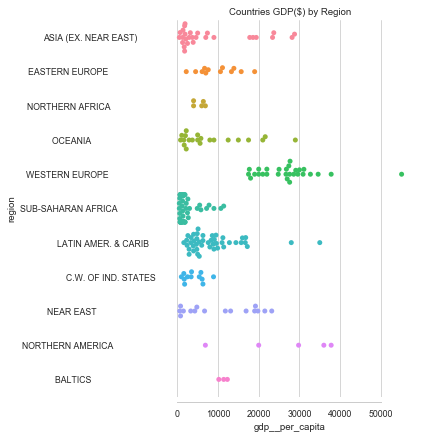

In [17]:
sns.set(style='whitegrid')
sns.set_context('paper')

sns.catplot(y="region", x="gdp__per_capita", kind="swarm", height =6, data=countries)
sns.despine(left=True, offset=5, trim=True)
plt.title('Countries GDP($) by Region');

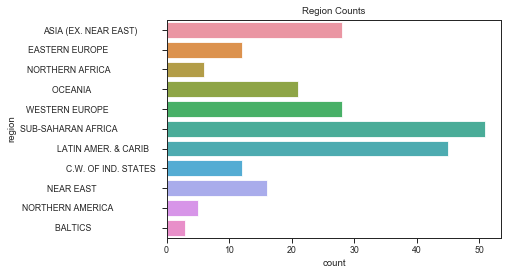

In [18]:
sns.set_style('ticks')
ctplt = sns.countplot(y="region", data=countries)
plt.title('Region Counts');

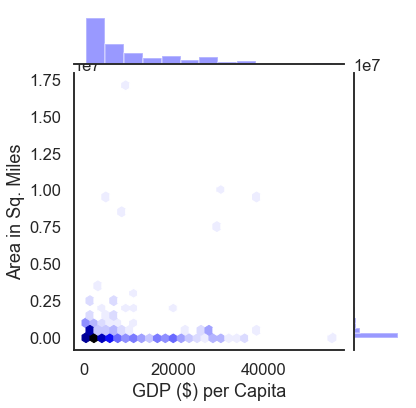

In [19]:
#sns.jointplot(y=payroll.base_salary, x=payroll., data=payroll);

sns.set_style("white")
sns.set_context('talk')
sns.jointplot(x=countries.gdp__per_capita, 
              y=countries.area_sq__mi_, 
              kind="hex", 
              color="blue").set_axis_labels("GDP ($) per Capita", "Area in Sq. Miles");

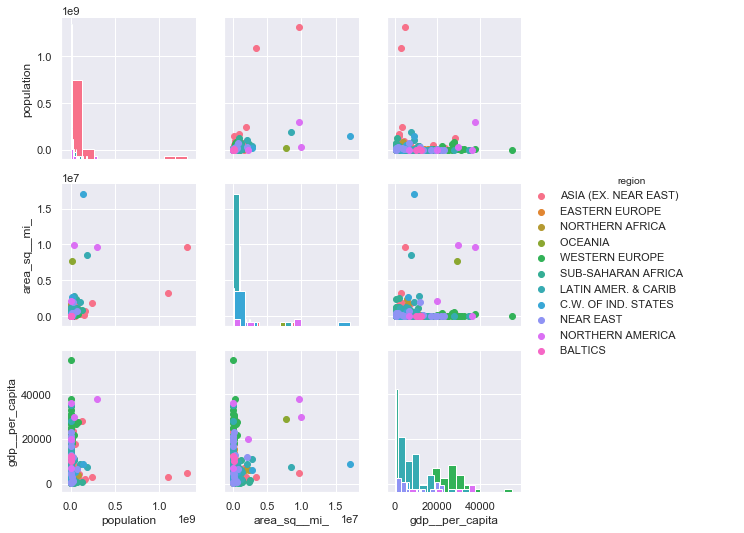

In [23]:
sns.set_context('notebook')
wtc= sns.PairGrid(countries, hue="region")
wtc = wtc.map_diag(plt.hist)
wtc= wtc.map_offdiag(plt.scatter)
wtc = wtc.add_legend();